In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('movie_bd_v5.xls')
data.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
1669,tt0449088,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/2007,6.8,2007
1045,tt1568338,42000000,46221189,Man on a Ledge,Sam Worthington|Elizabeth Banks|Jamie Bell|Ed ...,Asger Leth,You can only push an innocent man so far,An ex-cop turned con threatens to jump to his ...,102,Action|Thriller|Crime,Summit Entertainment|Di Bonaventura Picture,1/13/2012,6.2,2012
848,tt1464174,32000000,83615414,"Big Mommas: Like Father, Like Son",Portia Doubleday|Martin Lawrence|Brandon T. Ja...,John Whitesell,Momma's got back-up.,FBI agent Malcolm Turner and his 17-year-old s...,107,Crime|Comedy|Action,Twentieth Century Fox Film Corporation|Regency...,2/16/2011,5.4,2011
1016,tt1673434,120000000,829000000,The Twilight Saga: Breaking Dawn - Part 2,Kristen Stewart|Robert Pattinson|Taylor Lautne...,Bill Condon,The epic finale that will live forever,"After the birth of Renesmee, the Cullens gathe...",115,Adventure|Fantasy|Drama|Romance,Summit Entertainment|Sunswept Entertainment|Te...,11/13/2012,6.1,2012
346,tt0810784,8500000,4440055,Bright Star,Abbie Cornish|Ben Whishaw|Paul Schneider|Kerry...,Jane Campion,First love burns brightest.,"In 1818, high-spirited young Fanny Brawne find...",119,Drama|Romance,BBC Films|PathÃ© Renn Productions|UK Film Coun...,11/5/2009,6.3,2009


In [3]:
data.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000


# Предобработка

In [4]:
from collections import defaultdict
answers = {}  # создадим словарь для ответов

# тут другие ваши предобработки колонок например:

# the time given in the dataset is in string format.
# So we need to change this in datetime format
# ...


def profit(x):
    return x.revenue - x.budget


def get_unique(x):
    items, counts = np.unique(
        x.str.split('|').sum(), return_counts=True)
#         x.str.cat(sep='|').split('|'), return_counts=True)
    return items, counts


def get_summary(df, col1, col2, func=lambda x: x, month=False):
    cummulants = defaultdict(list)
    for _, x in df.iterrows():
        if not month:
            list_els = np.unique(x[col1].split('|'))
        else:
            list_els = np.unique(x[col1].split('/')[0])
        for el in list_els:
            cummulants[el].append(x[col2])
    for k, v in cummulants.items():
        cummulants[k] = func(v)
    return pd.DataFrame(cummulants.items(), columns=[col1, col2])

# 1. У какого фильма из списка самый большой бюджет?

Использовать варианты ответов в коде решения запрещено.    
Вы думаете и в жизни у вас будут варианты ответов?)

In [5]:
# в словарь вставляем номер вопроса и ваш ответ на него
# Пример:
answers['1'] = '2. Spider-Man 3 (tt0413300)'
# запишите свой вариант ответа
answers['1'] = 'Pirates of the Caribbean: On Stranger Tides'
# если ответили верно, можете добавить комментарий со значком "+"

In [6]:
# тут пишем ваш код для решения данного вопроса
data[data.budget == data.budget.max()].original_title

723    Pirates of the Caribbean: On Stranger Tides
Name: original_title, dtype: object

ВАРИАНТ 2

In [7]:
# можно добавлять разные варианты решения
data.iloc[data.budget.idxmax()].original_title

'Pirates of the Caribbean: On Stranger Tides'

# 2. Какой из фильмов самый длительный (в минутах)?

In [8]:
# думаю логику работы с этим словарем вы уже поняли,
# по этому не буду больше его дублировать
answers['2'] = 'Gods and Generals'

In [9]:
data[data.runtime == data.runtime.max()].original_title

1157    Gods and Generals
Name: original_title, dtype: object

In [10]:
data.iloc[data.runtime.idxmax()].original_title

'Gods and Generals'

# 3. Какой из фильмов самый короткий (в минутах)?





In [11]:
answers['3'] = data[data.runtime == data.runtime.min()].original_title
answers['3']

768    Winnie the Pooh
Name: original_title, dtype: object

In [12]:
data.iloc[data.runtime.idxmin()].original_title

'Winnie the Pooh'

# 4. Какова средняя длительность фильмов?


In [13]:
answers['4'] = data.runtime.mean()
answers['4']

109.6585494970884

# 5. Каково медианное значение длительности фильмов? 

In [14]:
answers['5'] = data.runtime.median()
answers['5']

107.0

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [15]:
# лучше код получения столбца profit вынести в Предобработку что в начале
data['profit'] = data.apply(profit, axis=1)
answers['6'] = data[data.profit == data.profit.max()].original_title

In [16]:
data.loc[data.profit.idxmax()].original_title

'Avatar'

In [17]:
answers['6']

239    Avatar
Name: original_title, dtype: object

# 7. Какой фильм самый убыточный? 

In [18]:
answers['7'] = data.loc[data.profit.idxmin()].original_title
answers['7']

'The Lone Ranger'

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [19]:
answers['8'] = data[data.revenue > data.budget].shape[0]
answers['8']

1478

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [20]:
answers['9'] = data.iloc[data[data.release_year == 2008].revenue.idxmax()].original_title
answers['9']

'The Dark Knight'

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [21]:
answers['10'] = data.iloc[data[data.release_year.isin(
    [2012, 2013, 2014])].profit.idxmin()].original_title
answers['10']

'The Lone Ranger'

# 11. Какого жанра фильмов больше всего?

In [22]:
# эту задачу тоже можно решать разными подходами, попробуй реализовать разные варианты
# если будешь добавлять функцию - выноси ее в предобработку что в начале
unique_genres, counts = get_unique(data.genres)
answers['11'] = unique_genres[counts.argmax()]
answers['11']

'Drama'

ВАРИАНТ 2

In [23]:
get_summary(data, 'genres', 'original_title', len).sort_values(
    by='original_title', ascending=False).iloc[0].genres

'Drama'

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [24]:
# def f12(x):
#     return (np.array(x) > 0).sum() / len(x)

def f12(x):
    return (np.array(x) > 0).sum()

In [25]:
ans = get_summary(data, 'genres', 'profit', func=f12).sort_values(
    by='profit', ascending=False)

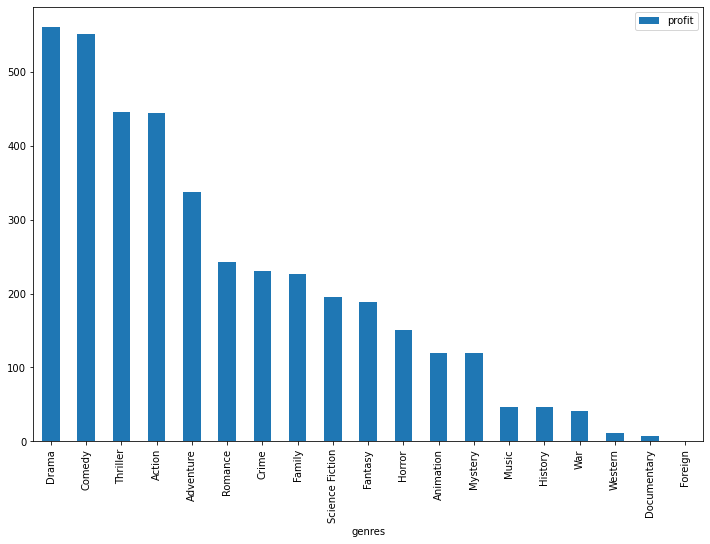

In [26]:
ans.plot.bar(x='genres', figsize=(12, 8))

In [27]:
answers['12'] = ans.iloc[0].genres
answers['12']

'Drama'

In [28]:
get_summary(data, 'genres', 'profit', func=f12)

,genres,profit
0,Action,444
1,Adventure,337
2,Science Fiction,195
3,Thriller,446
4,Fantasy,188
5,Crime,231
6,Drama,560
7,Western,12
8,Animation,120
9,Comedy,551


In [29]:
(get_summary(data, 'genres', 'profit', func=f12).profit / get_summary(data, 'genres', 'profit', func=len).profit).sort_values(ascending=False)

17    0.875000
10    0.869231
8     0.863309
16    0.852273
4     0.846847
1     0.812048
9     0.806735
2     0.786290
12    0.785714
0     0.762887
3     0.748322
14    0.741935
15    0.734375
5     0.733333
6     0.716113
11    0.708333
13    0.706897
7     0.631579
18    0.000000
Name: profit, dtype: float64

# 13. У какого режиссера самые большие суммарные кассовые сбооры?

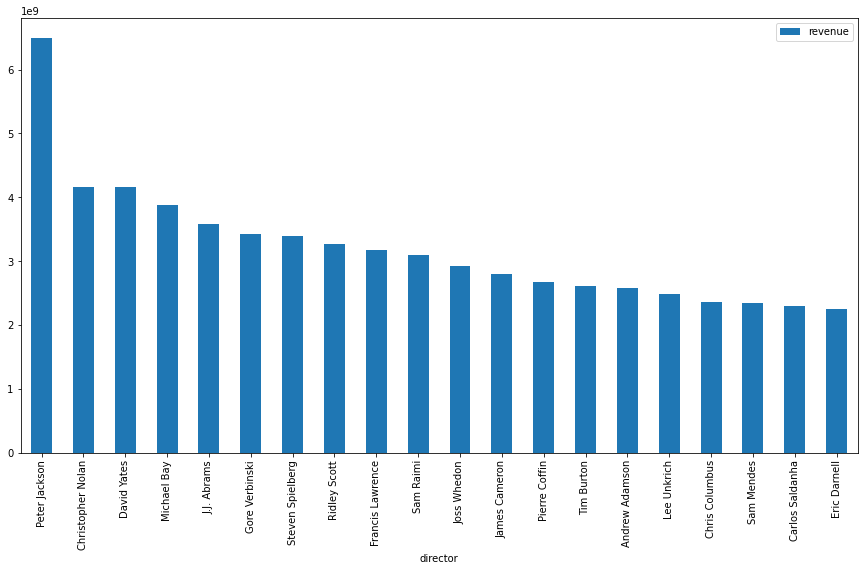

In [30]:
ans = get_summary(data, 'director', 'revenue', np.sum).sort_values(
    by='revenue', ascending=False)
ans.head(20).plot.bar(x='director', figsize=(15, 8))

In [31]:
answers['13'] = ans.iloc[0].director
answers['13']

'Peter Jackson'

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [32]:
ans = get_summary(data, 'director', 'genres', lambda x: (np.array('|'.join(x).split('|')) == 'Action').sum()).sort_values(
    by='genres', ascending=False)

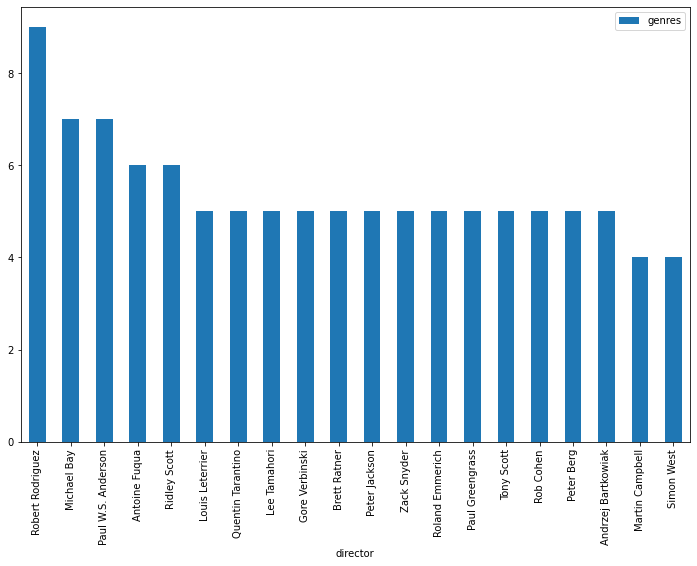

In [33]:
ans.head(20).plot.bar(x='director', figsize=(12, 8))

In [34]:
answers['14'] = ans.iloc[0].director
answers['14']

'Robert Rodriguez'

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

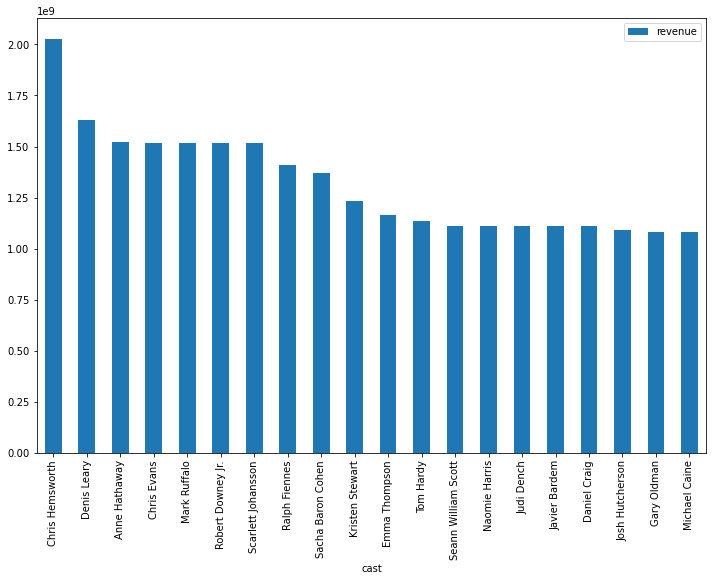

In [35]:
ans = get_summary(data[data['release_year'] == 2012], 'cast',
                  'revenue', np.sum).sort_values(by='revenue', ascending=False)
ans.head(20).plot.bar(x='cast', figsize=(12, 8))

In [36]:
answers['15'] = ans.iloc[0].cast
answers['15']

'Chris Hemsworth'

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

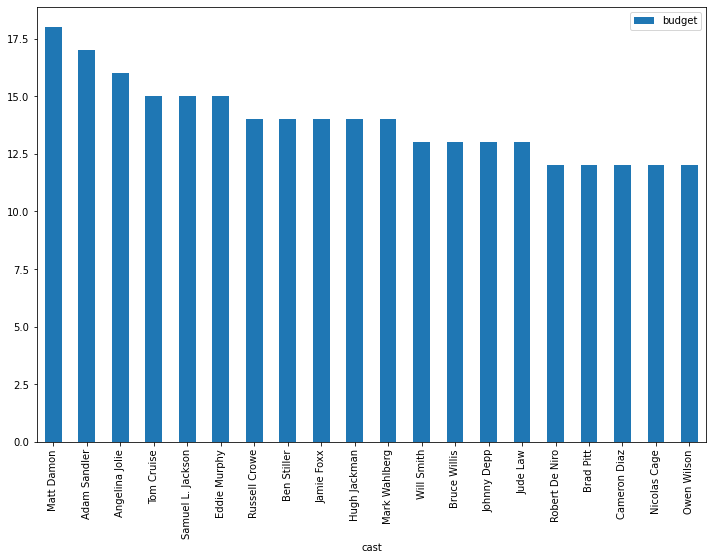

In [37]:
ans = get_summary(data[data.budget > data.budget.mean()], 'cast',
                  'budget', len).sort_values(by='budget', ascending=False)
ans.head(20).plot.bar(x='cast', figsize=(12, 8))

In [38]:
answers['16'] = ans.iloc[0].cast
answers['16']

'Matt Damon'

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

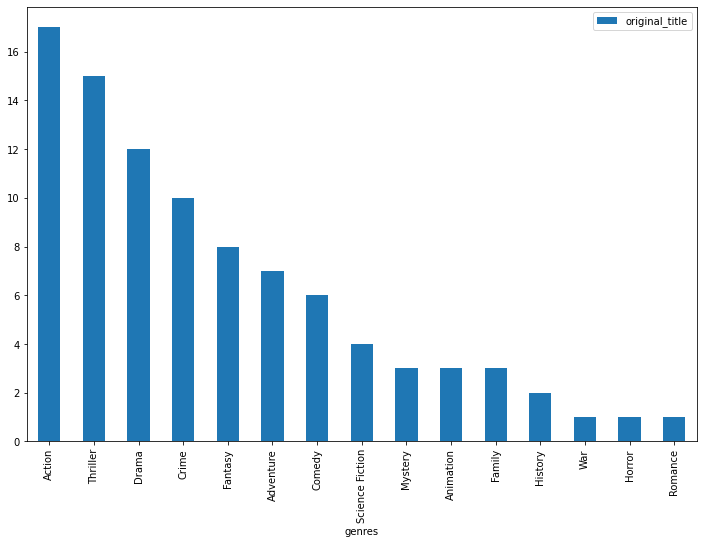

In [39]:
ans = get_summary(data[data.cast.str.contains('Nicolas Cage')], 'genres',
                  'original_title', len).sort_values(by='original_title', ascending=False)
ans.head(20).plot.bar(x='genres', figsize=(12, 8))

In [40]:
answers['17'] = ans.iloc[0].genres
answers['17']

'Action'

# 18. Самый убыточный фильм от Paramount Pictures

In [41]:
ans = data.iloc[data[data.production_companies.str.contains(
    'Paramount Pictures')].profit.idxmin()].original_title
answers['18'] = ans
answers['18']

'K-19: The Widowmaker'

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [42]:
ans = data.groupby(by='release_year', )[
    'revenue'].sum().sort_values(ascending=False).index[0]
answers['19'] = ans
answers['19']

2015

# 20. Какой самый прибыльный год для студии Warner Bros?

In [43]:
ans = data[data.production_companies.str.contains('Warner Bros')].groupby(
    by='release_year', )['profit'].sum().sort_values(ascending=False).index[0]
answers['20'] = ans
answers['20']

2014

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [44]:
ans = get_summary(data, 'release_date', 'original_title', len, month=True).sort_values(
    'original_title', ascending=False).iloc[0].release_date
answers['21'] = ans
answers['21']

'9'

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [45]:
ans = get_summary(data, 'release_date', 'original_title', len,
                  month=True).sort_values('original_title', ascending=False)
ans = ans[ans.release_date.isin(['6', '7', '8'])].original_title.sum()
answers['22'] = ans
answers['22']

450

# 23. Для какого режиссера зима – самое продуктивное время года? 

'Peter Jackson'

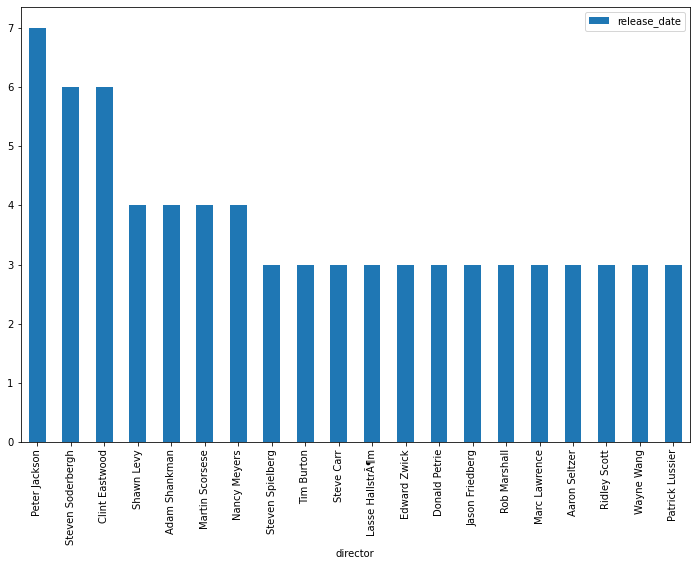

In [46]:
def f23(x): return len([el.split('/')[0]
                        for el in x if el.split('/')[0] in ['1', '2', '12']])


ans = get_summary(data, 'director', 'release_date', f23).sort_values(
    'release_date', ascending=False)


ans.head(20).plot.bar(x='director', figsize=(12, 8))
ans = ans.iloc[0].director
answers['23'] = ans
answers['23']

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

'Four By Two Productions'

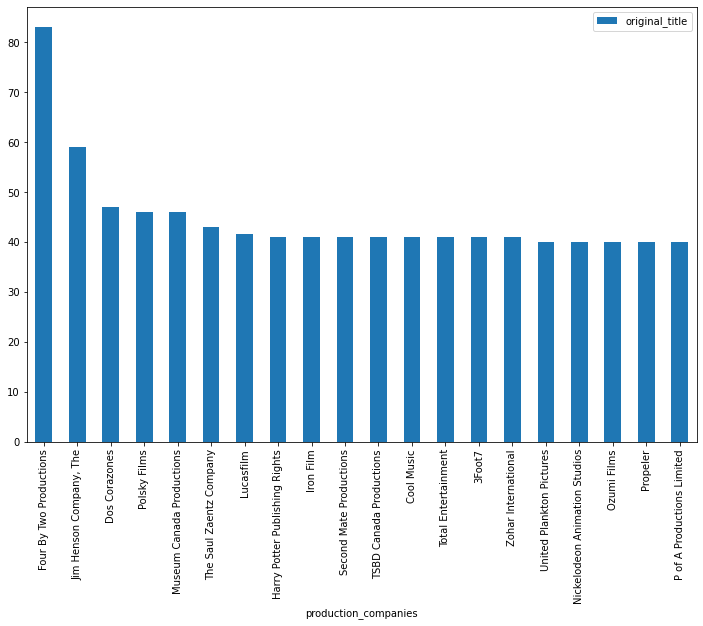

In [47]:
def f24(x): return np.mean([len(el) for el in x])


ans = get_summary(data, 'production_companies', 'original_title',
                  f24).sort_values('original_title', ascending=False)


ans.head(20).plot.bar(x='production_companies', figsize=(12, 8))
ans = ans.iloc[0].production_companies
answers['24'] = ans
answers['24']

In [48]:
data[data.production_companies.str.contains(
    'Four By Two Productions')].iloc[0].original_title

'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan'

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

'Midnight Picture Show'

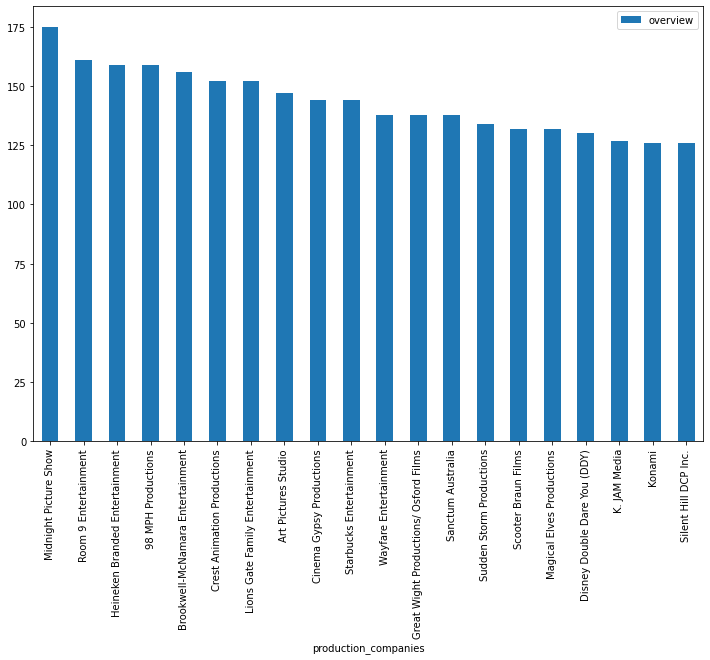

In [49]:
def f25(x):
    return np.mean([len(el.split()) for el in x])


ans = get_summary(data, 'production_companies', 'overview',
                  f25).sort_values('overview', ascending=False)


ans.head(20).plot.bar(x='production_companies', figsize=(12, 8))
ans = ans.iloc[0].production_companies
answers['25'] = ans
answers['25']

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [50]:
ans = data[data.vote_average > data.vote_average.quantile(0.99)][[
    'original_title']].values
answers['26'] = ans
answers['26']

array([['Inside Out'],
       ['Room'],
       ['Interstellar'],
       ['Guardians of the Galaxy'],
       ['The Imitation Game'],
       ['Gone Girl'],
       ['The Grand Budapest Hotel'],
       ['Inception'],
       ['The Dark Knight'],
       ['The Pianist'],
       ['The Lord of the Rings: The Return of the King'],
       ['The Wolf of Wall Street'],
       ['12 Years a Slave'],
       ['Memento']], dtype=object)

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [51]:
ans = get_summary(data, 'cast', 'cast', lambda x: np.concatenate([el.split('|') for el in x]))
ans.columns = ['actor', 'pair']
ans['value'] = 1
ans1 = ans.explode('pair')

ans = ans1[ans1.actor != ans1.pair]
ans = ans.groupby(['actor', 'pair'])['value'].sum().sort_values(ascending=False).iloc[:10]

In [52]:
answers['27'] = ans
answers['27']

actor                 pair                
Emma Watson           Rupert Grint            8
Daniel Radcliffe      Emma Watson             8
Rupert Grint          Daniel Radcliffe        8
Daniel Radcliffe      Rupert Grint            8
Emma Watson           Daniel Radcliffe        8
Rupert Grint          Emma Watson             8
Ben Stiller           Owen Wilson             6
Johnny Depp           Helena Bonham Carter    6
Owen Wilson           Ben Stiller             6
Helena Bonham Carter  Johnny Depp             6
Name: value, dtype: int64

In [53]:
ans = ans.reset_index(level=[0,1])
ans['sorted_row'] = [sorted([a,b]) for a,b in zip(ans.actor, ans.pair)]
ans['sorted_row'] = ans['sorted_row'].astype(str)
ans.drop_duplicates(subset=['sorted_row'], inplace=True)
ans

,actor,pair,value,sorted_row
0,Emma Watson,Rupert Grint,8,"['Emma Watson', 'Rupert Grint']"
1,Daniel Radcliffe,Emma Watson,8,"['Daniel Radcliffe', 'Emma Watson']"
2,Rupert Grint,Daniel Radcliffe,8,"['Daniel Radcliffe', 'Rupert Grint']"
6,Ben Stiller,Owen Wilson,6,"['Ben Stiller', 'Owen Wilson']"
7,Johnny Depp,Helena Bonham Carter,6,"['Helena Bonham Carter', 'Johnny Depp']"


ВАРИАНТ 2

# Submission

In [54]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

{'1': 'Pirates of the Caribbean: On Stranger Tides',
 '2': 'Gods and Generals',
 '3': 768    Winnie the Pooh
 Name: original_title, dtype: object,
 '4': 109.6585494970884,
 '5': 107.0,
 '6': 239    Avatar
 Name: original_title, dtype: object,
 '7': 'The Lone Ranger',
 '8': 1478,
 '9': 'The Dark Knight',
 '10': 'The Lone Ranger',
 '11': 'Drama',
 '12': 'Drama',
 '13': 'Peter Jackson',
 '14': 'Robert Rodriguez',
 '15': 'Chris Hemsworth',
 '16': 'Matt Damon',
 '17': 'Action',
 '18': 'K-19: The Widowmaker',
 '19': 2015,
 '20': 2014,
 '21': '9',
 '22': 450,
 '23': 'Peter Jackson',
 '24': 'Four By Two Productions',
 '25': 'Midnight Picture Show',
 '26': array([['Inside Out'],
        ['Room'],
        ['Interstellar'],
        ['Guardians of the Galaxy'],
        ['The Imitation Game'],
        ['Gone Girl'],
        ['The Grand Budapest Hotel'],
        ['Inception'],
        ['The Dark Knight'],
        ['The Pianist'],
        ['The Lord of the Rings: The Return of the King'],
        ['T

In [55]:
# и убедиться что ни чего не пропустил)
len(answers)

27